In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
import warnings


warnings.filterwarnings('ignore')

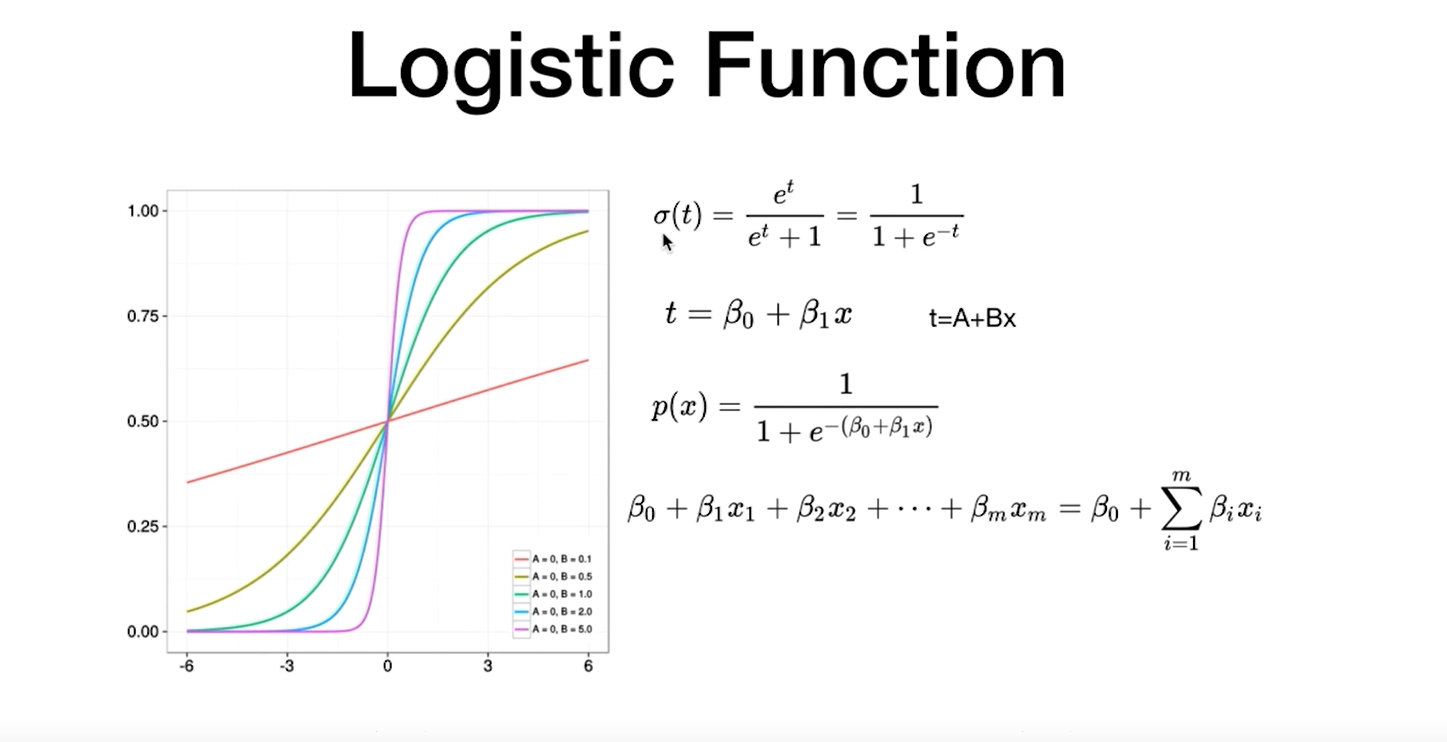

### Bu sefer predict etmek istediğimiz şey farklı. cinsiyet tahmini yapcaz

# R2 hesaplamaları ve error hesaplamaları ile alakalı str değerleri yüzünden sürekli hata çıkıyor. O yüzden e = 1 ve k = 2 olacak şekilde bir cinsiyet encoding yapma ihtiyacı duydum maalesef

In [2]:
data = pd.read_pickle('veriler.pkl')

In [3]:
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


### Veriyi normalize edelim. Bunun için de seçeceğimiz columnlar datadaki boy	kilo	yas	columnları olacak.

In [4]:
categorical_columns = data.select_dtypes(include = 'object').columns.to_list()
print(categorical_columns)

categorical = categorical_columns

columns_to_normalize = [col for col in data.columns if col not in categorical]
print(columns_to_normalize)

['ulke', 'cinsiyet']
['boy', 'kilo', 'yas']


In [5]:
data[['boy','kilo','yas']] = data[['boy','kilo','yas']].astype('float32')

columns_to_normalize = ['boy','kilo','yas']
# verideki nümerik columnları float 32 datatype yapalım
#columns_to_normalize = columns_to_normalize.astype('float32')


In [6]:
columns_to_normalize

['boy', 'kilo', 'yas']

In [7]:
from sklearn.preprocessing import MinMaxScaler

df_continuous = data[columns_to_normalize]
min_max_columns_names = list(df_continuous.columns)
all_scalers = {}

for column_name in min_max_columns_names:
    scaler = MinMaxScaler()
    scaler.fit(df_continuous[[column_name]])
    all_scalers[column_name] = scaler
    
for column_name, scaler in all_scalers.items():
    df_continuous[column_name] = scaler.transform(df_continuous[[column_name]].values.reshape(-1, 1))


In [8]:
normalized_data = pd.concat([df_continuous,data[categorical]], axis= 1)

normalized_data = normalized_data.reindex(data.columns, axis = 1)

data = normalized_data

In [9]:
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,0.073529,0.000000,0.021739,e
1,tr,0.000000,0.080000,0.043478,e
2,tr,0.147059,0.053333,0.021739,k
3,tr,0.117647,0.000000,0.000000,k
4,tr,0.058824,0.106667,0.065217,e
5,tr,0.808823,0.800000,0.456522,e
6,tr,0.955882,0.666667,0.347826,e
7,tr,0.735294,0.800000,0.565217,e
8,tr,0.764706,0.400000,0.282609,k
9,us,0.882353,1.000000,0.521739,e


# Elimizde normalize edilmiş bir veri var. Outlier kısmına kafa yormadan bir logistic regression model çalışmalarına geçebiliriz

In [10]:
X = data.iloc[:,1:4].values
y = data.iloc[:,4:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
logistic_reg = LogisticRegression(penalty='l2',random_state = 42)

logistic_reg.fit(X_train, y_train)

y_pred = logistic_reg.predict(X_test)

In [12]:
print(y_pred)

['k' 'k' 'e' 'k' 'k' 'e' 'k']


In [13]:
y_test.tolist() #7de 3 tahmin baya kötü oldu :(

[['e'], ['k'], ['k'], ['e'], ['e'], ['e'], ['k']]

In [14]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, logistic_reg.predict(X_test)))) # düşük accuracy

Model accuracy score: 0.4286


logistic_reg.fit(X, y)

model=sm.OLS(logistic_reg.predict(X),X)
print(model.fit().summary())

#### y değeri string değeri olduğundan hata aldım :(

###  Bir confusion matrix oluşturalım

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.50      0.25      0.33         4
           k       0.40      0.67      0.50         3

    accuracy                           0.43         7
   macro avg       0.45      0.46      0.42         7
weighted avg       0.46      0.43      0.40         7



In [16]:
TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.4286


#### Applying 5-Fold Cross Validation


In [17]:
scores = cross_val_score(logistic_reg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.66666667 1.         1.         1.         1.        ]


### future prediction yapalım. öncesinde denormalize işlemi

In [18]:
for column_name, scaler in all_scalers.items():
    df_continuous[column_name] = scaler.inverse_transform(df_continuous[[column_name]])
df_continuous

,boy,kilo,yas
0,130.000000,30.000000,10.000000
1,125.000000,36.000000,11.000000
2,135.000000,34.000000,10.000000
3,133.000000,30.000000,9.000000
4,129.000000,38.000000,12.000000
5,180.000000,90.000000,30.000000
6,190.000000,80.000000,25.000000
7,175.000000,90.000000,35.000000
8,177.000000,60.000000,22.000000
9,185.000000,104.999992,33.000000


In [19]:
input_data = np.array([181.0, 73.0, 22.0]).reshape(1, -1)
print(logistic_reg.predict(input_data))

# kendi değerlerimi girdim erkek olarak tahmin edebildi

['e']


In [20]:
cols_to_encode = ['cinsiyet']

# one-hot encode the selected columns and append them to your original dataframe
encoded_cols = pd.get_dummies(data[cols_to_encode], dtype = np.float32)
df = pd.concat([data[categorical], encoded_cols],axis=1)

# drop the original columns that were one-hot encoded
df.drop(cols_to_encode, axis=1,inplace=True)

# float veri oluşturan columnları hazırlayalım
float_columns = normalized_data.select_dtypes(include=['float']).columns
float_data = normalized_data[float_columns]

normalized_data = pd.concat([float_data, df], axis=1)
data = normalized_data

#### Test verileri üzerinde tahmin yapalım

In [21]:
data

,boy,kilo,yas,ulke,cinsiyet_e,cinsiyet_k
0,0.073529,0.000000,0.021739,tr,1.0,0.0
1,0.000000,0.080000,0.043478,tr,1.0,0.0
2,0.147059,0.053333,0.021739,tr,0.0,1.0
3,0.117647,0.000000,0.000000,tr,0.0,1.0
4,0.058824,0.106667,0.065217,tr,1.0,0.0
5,0.808823,0.800000,0.456522,tr,1.0,0.0
6,0.955882,0.666667,0.347826,tr,1.0,0.0
7,0.735294,0.800000,0.565217,tr,1.0,0.0
8,0.764706,0.400000,0.282609,tr,0.0,1.0
9,0.882353,1.000000,0.521739,us,1.0,0.0


In [22]:
y_hat = logistic_reg.predict(X)

y_hat = np.where(y_hat == 'e', 1, 0)
y_true = np.where(y == 'e', 1, 0)  # 'e' değerlerini 1, diğer değerleri 0 olarak düzeltin

# Regresyon metriklerini kullanarak modelin performansını değerlendirin
mae = metrics.mean_absolute_error(y_true, y_hat)
mse = metrics.mean_squared_error(y_true, y_hat)
rmse = np.sqrt(mse)

# R2 değerini hesaplayın
total_variation = np.sum((y_true - np.mean(y_true)) ** 2)
explained_variation = np.sum((y_hat - np.mean(y_true)) ** 2)
r2 = explained_variation / total_variation

# Düzeltilmiş R2 (Adjusted R2) değerini hesaplayın
n = len(y_true)
p = X.shape[1]  # X veri matrisinin sütun sayısı (bağımsız değişken sayısı)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("TEST SET")
print("========")
print("MAE:           ", mae)
print("MSE:           ", mse)
print("RMSE:          ", rmse)
print("R2:            ", r2)
print("Adjusted R2:   ", adjusted_r2)

TEST SET
MAE:            0.22727272727272727
MSE:            0.22727272727272727
RMSE:           0.4767312946227962
R2:             1.0
Adjusted R2:    1.0


## ROC - AUC ekleyelim

AUC Score: 0.3333333333333333


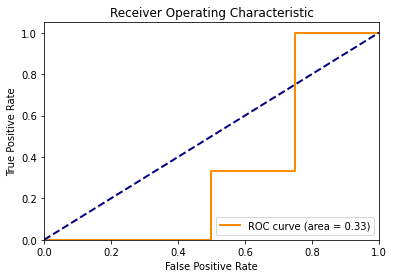

In [23]:
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Sınıf olasılıklarını alın
y_scores = logistic_reg.predict_proba(X_test)[:, 1]

# ROC eğrisini hesapla
fpr, tpr, _ = roc_curve(y_true_encoded, y_scores)
roc_auc = auc(fpr, tpr)

# AUC değerini ekrana yazdır
print('AUC Score:', roc_auc)

# AUC eğrisini çizdir
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### ilk 5 data row'unu çıkartıp hesaplamaları bir de öyle deneyelim. özellikle boy ciddi bir outlier durumda

In [24]:
data = pd.read_pickle('veriler.pkl')

In [25]:
categorical_columns = data.select_dtypes(include = 'object').columns.to_list()
#print(categorical_columns)

categorical = categorical_columns

columns_to_normalize = [col for col in data.columns if col not in categorical]
#print(columns_to_normalize)

In [26]:
data[['boy','kilo','yas']] = data[['boy','kilo','yas']].astype('float32')

columns_to_normalize = ['boy','kilo','yas']

In [27]:
from sklearn.preprocessing import MinMaxScaler

df_continuous = data[columns_to_normalize]
min_max_columns_names = list(df_continuous.columns)
all_scalers = {}

for column_name in min_max_columns_names:
    scaler = MinMaxScaler()
    scaler.fit(df_continuous[[column_name]])
    all_scalers[column_name] = scaler
    
for column_name, scaler in all_scalers.items():
    df_continuous[column_name] = scaler.transform(df_continuous[[column_name]].values.reshape(-1, 1))
    
normalized_data = pd.concat([df_continuous,data[categorical]], axis= 1)

normalized_data = normalized_data.reindex(data.columns, axis = 1)

data = normalized_data

In [28]:
data = data.iloc[5:]
data

,ulke,boy,kilo,yas,cinsiyet
5,tr,0.808823,0.800000,0.456522,e
6,tr,0.955882,0.666667,0.347826,e
7,tr,0.735294,0.800000,0.565217,e
8,tr,0.764706,0.400000,0.282609,k
9,us,0.882353,1.000000,0.521739,e
10,us,0.588235,0.333333,0.391304,k
11,us,0.441177,0.266667,0.760870,k
12,us,0.514706,0.373333,0.652174,k
13,us,0.544118,0.386667,0.695652,k
14,us,0.617647,0.426667,1.000000,k


In [29]:
X = data.iloc[:,1:4].values
y = data.iloc[:,4:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
logistic_reg = LogisticRegression(penalty='l2',random_state = 42)

logistic_reg.fit(X_train, y_train)

y_pred = logistic_reg.predict(X_test)

LogisticRegression(random_state=42)


In [31]:
print(y_pred)

['e' 'e' 'k' 'k' 'e' 'k']


In [32]:
y_test.tolist() #6da 6 tahmin ciddi bir gelişme yaşandı

[['e'], ['e'], ['k'], ['k'], ['e'], ['k']]

### bir conf matrix

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00         3
           k       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [34]:
TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


#### Applying 5-Fold Cross Validation


In [35]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logistic_reg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[1.  0.5 1.  0.5 0.5]


### future prediction yapalım

In [36]:
for column_name, scaler in all_scalers.items():
    df_continuous[column_name] = scaler.inverse_transform(df_continuous[[column_name]])


In [37]:
df_continuous

,boy,kilo,yas
0,130.000000,30.000000,10.000000
1,125.000000,36.000000,11.000000
2,135.000000,34.000000,10.000000
3,133.000000,30.000000,9.000000
4,129.000000,38.000000,12.000000
5,180.000000,90.000000,30.000000
6,190.000000,80.000000,25.000000
7,175.000000,90.000000,35.000000
8,177.000000,60.000000,22.000000
9,185.000000,104.999992,33.000000


In [38]:
input_data = np.array([181.0, 73.0, 22.0]).reshape(1, -1)
print(logistic_reg.predict(input_data))

['e']


In [39]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, logistic_reg.predict(X_test)))) # ezberin allahını yaptı

Model accuracy score: 1.0000


In [40]:
cols_to_encode = ['cinsiyet']

# one-hot encode the selected columns and append them to your original dataframe
encoded_cols = pd.get_dummies(data[cols_to_encode], dtype = np.float32)
df = pd.concat([data[categorical], encoded_cols],axis=1)

# drop the original columns that were one-hot encoded
df.drop(cols_to_encode, axis=1,inplace=True)

# float veri oluşturan columnları hazırlayalım
float_columns = normalized_data.select_dtypes(include=['float']).columns
float_data = normalized_data[float_columns]

normalized_data = pd.concat([float_data, df], axis=1)
data = normalized_data

In [41]:
data

,boy,kilo,yas,ulke,cinsiyet_e,cinsiyet_k
0,0.073529,0.000000,0.021739,NaN,NaN,NaN
1,0.000000,0.080000,0.043478,NaN,NaN,NaN
2,0.147059,0.053333,0.021739,NaN,NaN,NaN
3,0.117647,0.000000,0.000000,NaN,NaN,NaN
4,0.058824,0.106667,0.065217,NaN,NaN,NaN
5,0.808823,0.800000,0.456522,tr,1.0,0.0
6,0.955882,0.666667,0.347826,tr,1.0,0.0
7,0.735294,0.800000,0.565217,tr,1.0,0.0
8,0.764706,0.400000,0.282609,tr,0.0,1.0
9,0.882353,1.000000,0.521739,us,1.0,0.0


In [42]:
# Test verileri üzerinde tahmin yapın
y_hat = logistic_reg.predict(X)

y_hat = np.where(y_hat == 'e', 1, 0)
y_true = np.where(y == 'e', 1, 0)  # 'e' değerlerini 1, diğer değerleri 0 olarak düzeltin

# Regresyon metriklerini kullanarak modelin performansını değerlendirin
mae = metrics.mean_absolute_error(y_true, y_hat)
mse = metrics.mean_squared_error(y_true, y_hat)
rmse = np.sqrt(mse)

# R2 değerini hesaplayın
total_variation = np.sum((y_true - np.mean(y_true)) ** 2)
explained_variation = np.sum((y_hat - np.mean(y_true)) ** 2)
r2 = explained_variation / total_variation

# Düzeltilmiş R2 (Adjusted R2) değerini hesaplayın
n = len(y_true)
p = X.shape[1]  # X veri matrisinin sütun sayısı (bağımsız değişken sayısı)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("TEST SET")
print("========")
print("MAE:           ", mae)
print("MSE:           ", mse)
print("RMSE:          ", rmse)
print("R2:            ", r2)
print("Adjusted R2:   ", adjusted_r2)

TEST SET
MAE:            0.058823529411764705
MSE:            0.058823529411764705
RMSE:           0.24253562503633297
R2:             0.9861111111111112
Adjusted R2:    0.982905982905983


### ROC - AUC ekleyelim

AUC Score: 1.0


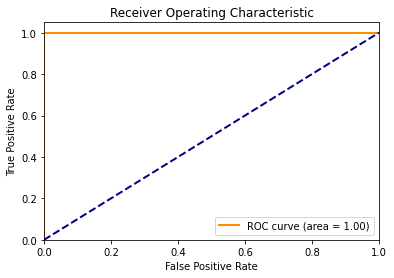

In [43]:
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Sınıf olasılıklarını alın
y_scores = logistic_reg.predict_proba(X_test)[:, 1]

# ROC eğrisini hesapla
fpr, tpr, _ = roc_curve(y_true_encoded, y_scores)
roc_auc = auc(fpr, tpr)

# AUC değerini ekrana yazdır
print('AUC Score:', roc_auc)

# AUC eğrisini çizdir
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Logistic Regresyon Discriminant eşiği değiştirerek de bir ek model yazalım, yani threshold'u değiştirme özgürlüğü kazanalım

In [107]:
data = pd.read_pickle("veriler.pkl")

# Kategorik olmayan sütunları float32 olarak dönüştürme
categorical_columns = data.select_dtypes(exclude='object').columns.to_list()
data[categorical_columns] = data[categorical_columns].astype('float32')

# 'cinsiyet' sütununu 1 ve 0'a dönüştürme
data['cinsiyet'] = data['cinsiyet'].apply(lambda x: 1 if x == 'e' else 0)

# Özellikler ve hedef değişkenleri ayırma
x = data.iloc[:, 1:4].values
y = data.iloc[:, 4:].values

# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

# Özellikleri normalize etme
columns_to_normalize = ['boy', 'kilo', 'yas']
df = data[columns_to_normalize]
data[columns_to_normalize] = MinMaxScaler().fit_transform(df)

In [108]:
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,0.073529,0.000000,0.021739,1
1,tr,0.000000,0.080000,0.043478,1
2,tr,0.147059,0.053333,0.021739,0
3,tr,0.117647,0.000000,0.000000,0
4,tr,0.058824,0.106667,0.065217,1
5,tr,0.808823,0.800000,0.456522,1
6,tr,0.955882,0.666667,0.347826,1
7,tr,0.735294,0.800000,0.565217,1
8,tr,0.764706,0.400000,0.282609,0
9,us,0.882353,1.000000,0.521739,1


In [109]:
X = data.iloc[:,1:4].values
y = data.iloc[:,4:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [110]:
logistic_reg = LogisticRegression(penalty='l2',random_state = 42)
#logistic_reg = LogisticRegression()

logistic_reg.fit(X_train, y_train)
#y_pred = logistic_reg.predict(X_test) #normalde aşağıdakiler yok bu hash açık direkt yürütürsün

predicted_probs = logistic_reg.predict_proba(X_test)
threshold = 0.9
predicted_classes = (predicted_probs[:, 1] > threshold).astype(int)

accuracy = accuracy_score(y_test, predicted_classes)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [111]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.50      0.25      0.33         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8



In [112]:
y_test.shape, y_pred.shape , y_test.shape

((8, 1), (8,), (8, 1))

In [113]:
TP = conf_matrix[0,0]
TN = conf_matrix[1,1]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.5000


In [114]:
#### Applying 5-Fold Cross Validation
scores = cross_val_score(logistic_reg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.66666667 1.         1.         1.         1.        ]


In [115]:
### future prediction yapalım
input_data = np.array([181.0, 73.0, 22.0]).reshape(1, -1)
print(logistic_reg.predict(input_data))

[1]


AUC Score: 0.4375


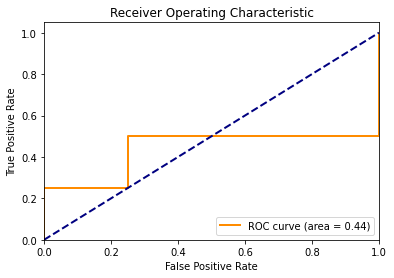

In [116]:
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Sınıf olasılıklarını alın
y_scores = logistic_reg.predict_proba(X_test)[:, 1]

# ROC eğrisini hesapla
fpr, tpr, _ = roc_curve(y_true_encoded, y_scores)
roc_auc = auc(fpr, tpr)

# AUC değerini ekrana yazdır
print('AUC Score:', roc_auc)

# AUC eğrisini çizdir
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()